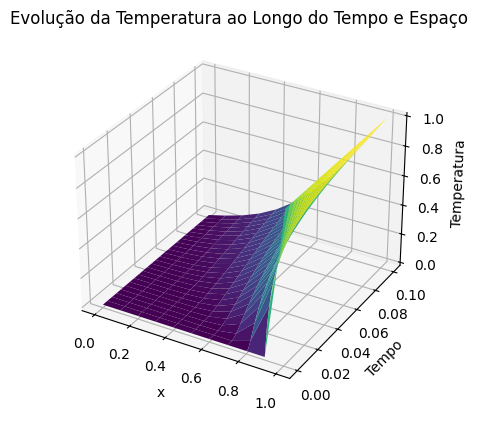

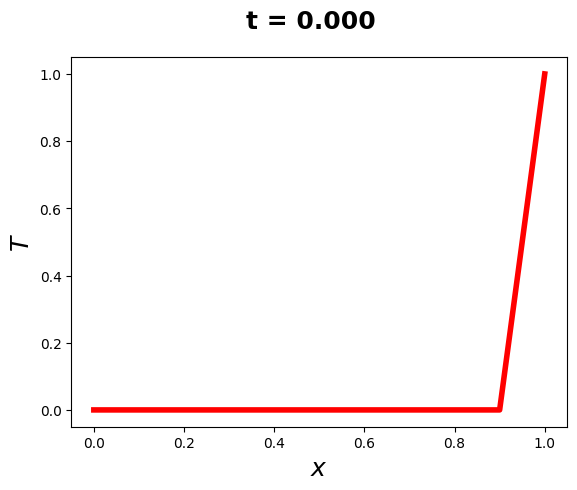

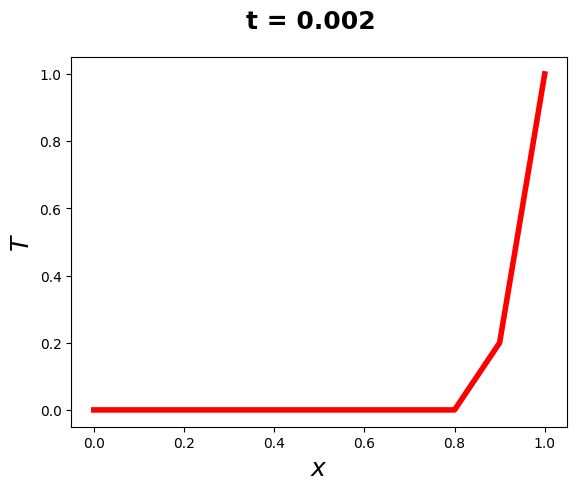

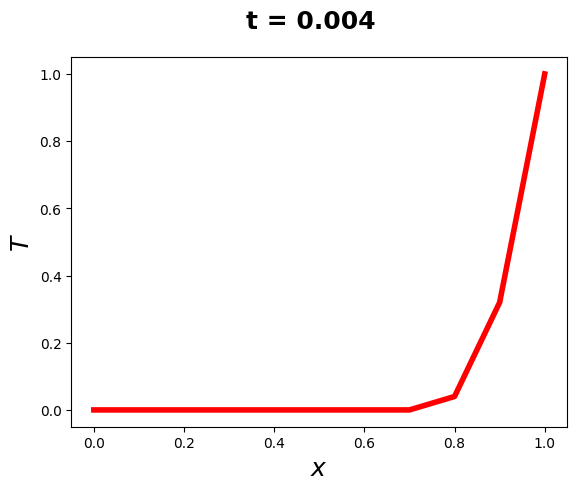

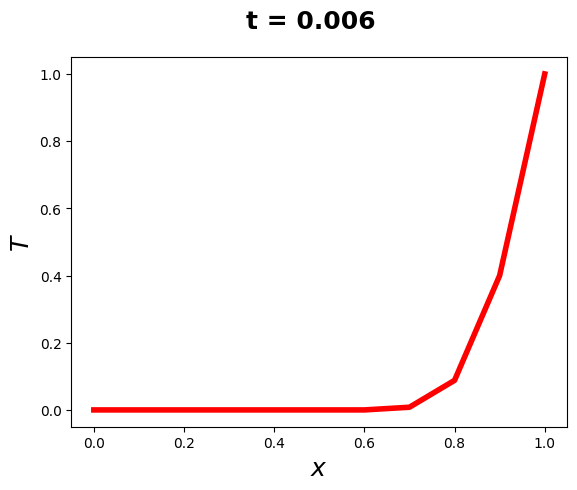

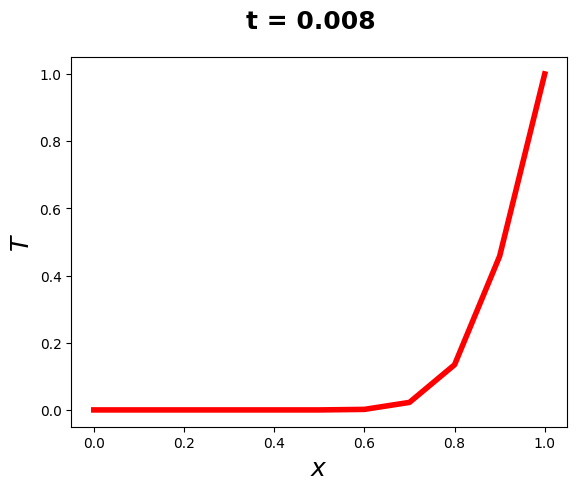

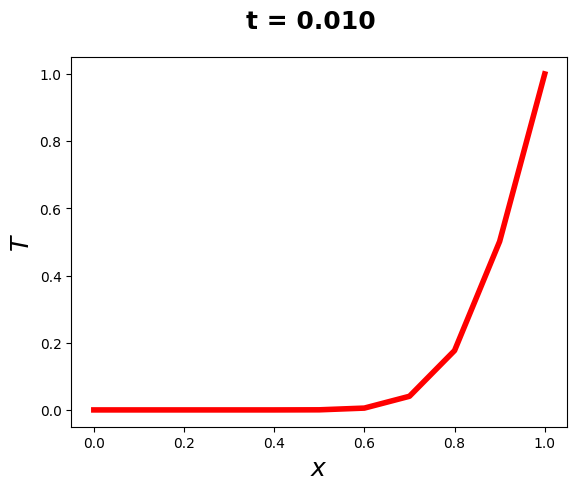

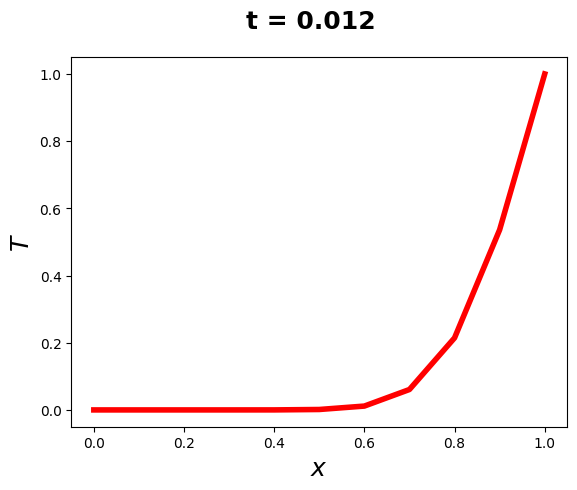

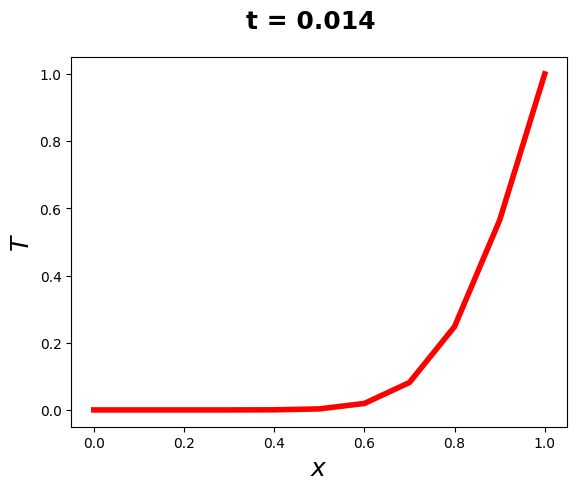

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Defina as variáveis diretamente
N = 10
kfinal = 50
L = 1.0
deltax = L / N
deltat = 0.2 * deltax ** 2

def inicializa_temperatura(N, cond_contorno):
    Temp = np.zeros(N + 1, float)
    if cond_contorno == 'Dirichlet':
        Temp[N] = 1.0
    elif cond_contorno == 'Neumann':
        Temp[0] = Temp[1]
    return Temp

def calcula_nova_temperatura(Temp, deltax, deltat, N, cond_contorno):
    Temp_nova = Temp.copy()
    for i in range(1, N):
        Temp_nova[i] = Temp[i] + (deltat / (deltax * deltax)) * (Temp[i + 1] - 2.0 * Temp[i] + Temp[i - 1])
    if cond_contorno == 'Dirichlet':
        Temp_nova[0] = 0
        Temp_nova[N] = 1
    elif cond_contorno == 'Neumann':
        Temp_nova[0] = Temp[1]
        Temp_nova[N] = Temp[N-1]
    return Temp_nova

def loop_temporal(N, kfinal, deltax, deltat, cond_contorno):
    Temp = inicializa_temperatura(N, cond_contorno)
    temps = [Temp.copy()]
    for k in range(kfinal):
        Temp = calcula_nova_temperatura(Temp, deltax, deltat, N, cond_contorno)
        temps.append(Temp.copy())
    return np.array(temps)

def plota_grafico_3d(x, t, temps, save_figures=False):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    X, T = np.meshgrid(x, t)
    ax.plot_surface(X, T, temps, cmap='viridis')
    ax.set_xlabel('x')
    ax.set_ylabel('Tempo')
    ax.set_zlabel('Temperatura')
    ax.set_title('Evolução da Temperatura ao Longo do Tempo e Espaço')
    if save_figures:
        plt.savefig('grafico_3d.png', format='png', dpi=300)
    plt.show()

def plota_graficos_2d(x, temps, deltat, kfinal, save_figures=False):
    for k in range(kfinal + 1):
        t = k * deltat
        fig = plt.figure()
        ax = fig.add_subplot()
        fig.suptitle('t = %.3f' % t, fontsize=18, fontweight='bold')
        ax.set_ylabel('$T$', fontsize=18)
        ax.set_xlabel('$x$', fontsize=18)
        plt.plot(x, temps[k], '-r', lw=4)
        if save_figures:
            plt.savefig(f'grafico_2d_t{k}.png', format='png', dpi=300)
        plt.show()

def simulacao(N=10, kfinal=10, L=1.0, deltat=None, cond_contorno='Dirichlet', save_figures=False):
    if deltat is None:
        deltax = L / N
        deltat = 0.2 * deltax * deltax
    
    x = np.linspace(0.0, L, N + 1)
    deltax = L / N

    temps = loop_temporal(N, kfinal, deltax, deltat, cond_contorno)
    t = np.linspace(0, kfinal * deltat, kfinal + 1)

    plota_grafico_3d(x, t, temps, save_figures)
    plota_graficos_2d(x, temps, deltat, kfinal, save_figures)

# Execute a simulação com as variáveis definidas
simulacao(N=N, kfinal=kfinal, L=L, deltat=deltat, cond_contorno=cond_contorno, save_figures=save_figures)


In [2]:
    plota_grafico_3d(x, t, temps, save_figures)
    plota_graficos_2d(x, temps, deltat, kfinal, save_figures)


NameError: name 'x' is not defined